import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline. (4 points)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline


Read in the iris data set and examine the head to make sure the data is in a usable format (2 points)

In [ ]:
iris = pd.read_table("iris.txt", sep=",")
iris.head()

Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns (1 point)

In [3]:
iris_petal = iris[["PetalLength", "PetalWidth"]]
iris_petal.head()



,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Create a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies. (1 point)


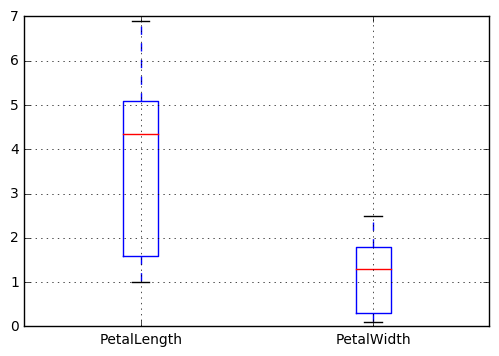

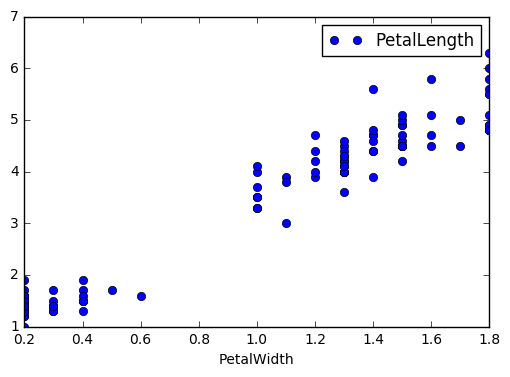

In [10]:
iris_petal.boxplot(return_type="axes")
x = iris[['PetalLength']]
y = iris[['PetalWidth']]
z = pd.merge(x, y, right_index=True, left_index=True)
z.plot(x='PetalWidth', y='PetalLength', style='o') 

Create a function to calculate the coefficients of a least squares approximation (1 point)

In [5]:
idp = iris_petal.as_matrix(columns=['PetalLength'])
rep = iris_petal.as_matrix(columns=['PetalWidth'])
def coeff(x,y):
    cf = np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)
    return cf


Create a function to use the least squares coefficients to predict the value of a given input point (1 point)


In [11]:
def regline(x, y):
    x1 = np.array([np.ones(len(x)), x[:,0]]).T
    inter = coeff(x1, y)
    x2 = np.linspace(x.min(), x.max(), 2)
    return x2, np.array(inter[0] + inter[1] * x2)
x_mat, y_mat = regline(idp, rep)

Plot the regression line on top of a scatter plot of the reduced data set

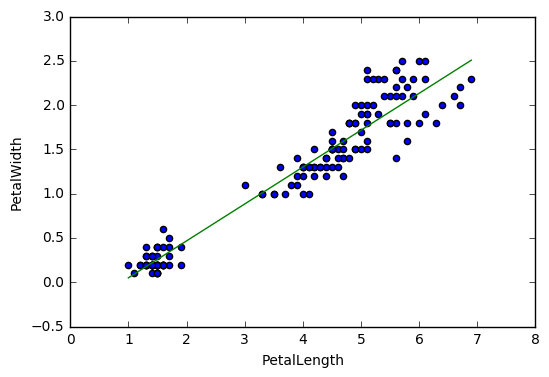

In [8]:
plt.scatter(idp, rep)
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")
plt.plot(x_mat, y_mat.T, color="g")
plt.show()